In [1]:
import numpy as np
import pandas as pd

import itertools as it

import warnings
warnings.filterwarnings("ignore", module = "matplotlib\..*" )

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors
%matplotlib inline

import networkx as nx

In [2]:
filename = '../data/geonames_countryInfo.txt'
meta1 = pd.read_csv(filename, skiprows=49, usecols=range(11), keep_default_na=False)
isos1 = set(pd.unique(meta1['ISO']))
country1 = set(pd.unique(meta1['Country']))

meta1.head()

,ISO,ISO3,ISO-Numeric,fips,Country,Capital,Area(in sq km),Population,Continent,Income,GlobalDesignation
0,AD,AND,20,AN,Andorra,Andorra la Vella,468.0,77006,EU,HI,GN
1,AE,ARE,784,AE,United Arab Emirates,Abu Dhabi,82880.0,9630959,AS,HI,GS
2,AF,AFG,4,AF,Afghanistan,Kabul,647500.0,37172386,AS,LO,GS
3,AG,ATG,28,AC,Antigua and Barbuda,St. John's,443.0,96286,NA,X,GS
4,AI,AIA,660,AV,Anguilla,The Valley,102.0,13254,NA,X,GS


In [3]:
filename = '../data/UNSD_Methodology.csv'
meta2 = pd.read_csv(filename, sep=';', keep_default_na=False)

isos2 = set(pd.unique(meta2['ISO']))

meta2.head()

,Global Code,Global Name,Region Code,Region Name,Subregion Code,Subregion Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,1,World,002,Africa,015,Northern Africa,,,Algeria,12,DZ,DZA,,,
1,1,World,002,Africa,015,Northern Africa,,,Egypt,818,EG,EGY,,,
2,1,World,002,Africa,015,Northern Africa,,,Libya,434,LY,LBY,,,
3,1,World,002,Africa,015,Northern Africa,,,Morocco,504,MA,MAR,,,
4,1,World,002,Africa,015,Northern Africa,,,Sudan,729,SD,SDN,x,,


In [4]:
meta = meta1.merge(meta2, how='inner', on='ISO')
meta = meta[meta['Region Name'] != '']
print(meta.shape)
meta.head()

(249, 25)


,ISO,ISO3,ISO-Numeric,fips,Country,Capital,Area(in sq km),Population,Continent,Income,...,Subregion Code,Subregion Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,AD,AND,20,AN,Andorra,Andorra la Vella,468.0,77006,EU,HI,...,039,Southern Europe,,,Andorra,20,AND,,,
1,AE,ARE,784,AE,United Arab Emirates,Abu Dhabi,82880.0,9630959,AS,HI,...,145,Western Asia,,,United Arab Emirates,784,ARE,,,
2,AF,AFG,4,AF,Afghanistan,Kabul,647500.0,37172386,AS,LO,...,034,Southern Asia,,,Afghanistan,4,AFG,x,x,
3,AG,ATG,28,AC,Antigua and Barbuda,St. John's,443.0,96286,NA,X,...,419,Latin America and the Caribbean,029,Caribbean,Antigua and Barbuda,28,ATG,,,x
4,AI,AIA,660,AV,Anguilla,The Valley,102.0,13254,NA,X,...,419,Latin America and the Caribbean,029,Caribbean,Anguilla,660,AIA,,,x


In [5]:
pd.unique(meta['Subregion Name'])

array(['Southern Europe', 'Western Asia', 'Southern Asia',
       'Latin America and the Caribbean', 'Sub-Saharan Africa',
       'Polynesia', 'Western Europe', 'Australia and New Zealand',
       'Northern Europe', 'Eastern Europe', 'Northern America',
       'South-eastern Asia', 'Eastern Asia', 'Northern Africa',
       'Melanesia', 'Micronesia', 'Central Asia'], dtype=object)

In [6]:
meta['Continent'] = meta['Subregion Name']

meta.loc[meta['Region Name'] == 'Europe', 'Continent'] = 'Europe'
meta.loc[meta['Region Name'] == 'Oceania', 'Continent'] = 'Oceania'

meta.loc[meta['Subregion Name'] == 'Western Asia', 'Continent'] = 'WANA'
meta.loc[meta['Subregion Name'] == 'Northern Africa', 'Continent'] = 'WANA'

meta.loc[meta['Subregion Name'] == 'Southern Asia', 'Continent'] = 'Rest of Asia'
meta.loc[meta['Subregion Name'] == 'South-eastern Asia', 'Continent'] = 'Rest of Asia'
meta.loc[meta['Subregion Name'] == 'Eastern Asia', 'Continent'] = 'Rest of Asia'
meta.loc[meta['Subregion Name'] == 'Central Asia', 'Continent'] = 'Rest of Asia'

meta.loc[meta['Country'] == 'China', 'Continent'] = 'China'
#meta.loc[meta['Country'] == 'Hong Kong', 'Continent'] = 'China'
#meta.loc[meta['Country'] == 'Macao', 'Continent'] = 'China'

In [7]:
pd.unique(meta['Continent'])

array(['Europe', 'WANA', 'Rest of Asia',
       'Latin America and the Caribbean', 'Sub-Saharan Africa', 'Oceania',
       'Northern America', 'China'], dtype=object)

In [16]:
filename = '../data/geonames_UNSD_WUP_metadata.csv'
meta.to_csv(filename, index=False)

In [8]:
filename = '../data/Plt_sci_publications_geocoordinated_8.19.csv'
data = pd.read_csv(filename, usecols=list(range(7,15)) + list(range(52, 59)))
print(data.shape)
data.head()

(296447, 15)


,Addresses--all authors,Nations--all authors,Corresponding author Addresses,Corresponding author Nation,Corresponding author Continent,Corresponding author global designation,DOI,Email Addresses,_merge,Locations--all authors,Geocoords--all authors,Corresponding author locations,Corresponding author geocoords,Number of authoring countries,Number of corresponding countries
0,"[Raho, Nicolas; Abad, Jose P.; Marin, Irma] Un...",Spain; United States,"Abad, JP; Marin, I (corresponding author), Uni...",Spain,Europe,Global North,10.1080/09670262.2017.1386328,josep.abad@uam.es; irma.marin@uam.es,both,"Madrid, Mostoles, Spain; Vigo, Pontevedra, Spa...","(40.3232129, -3.8676291); (42.24059889999999, ...","Madrid, Mostoles, Spain","(40.3232129, -3.8676291)",2,1
1,"[Abdel-Hafez, Sobhy I. I.; Abdel-Rahim, Ismail...",Egypt,"Abdel-Rahim, IR (corresponding author), Assiut...",Egypt,Africa,Global South,10.1080/09670262.2015.1028105,Ismail.mahmoud@Science.au.edu.eg,both,"Assiut, Egypt","(27.1783117, 31.1859257)","Assiut, Egypt","(27.1783117, 31.1859257)",1,1
2,"[Abdelahad, Nadia; Amadio, Carolina] Sapienza ...",Italy; United States,"Abdelahad, N (corresponding author), Sapienza ...",Italy,Europe,Global North,10.1080/09670262.2015.1055592,nadia.abdelahad@uniroma1.it,both,"Rome, RM, Italy; Sez Istol, Parma, Italy; Athe...","(39.3292396, -82.1012554); (41.90278350000001,...","Rome, RM, Italy","(41.90278350000001, 12.4963655)",2,1
3,"[Aboal, Marina] Fac Biol, Dept Plant Biol, Lab...",Spain; Australia; England; Brazil,"Aboal, M (corresponding author), Fac Biol, Dep...",Spain,Europe,Global North,10.1080/09670262.2017.1402374,maboal@um.es,both,"Murcia, Espinardo, Spain; Armilla, Granada, Sp...","(-20.8127115, -49.376521); (-37.7787036, 144.9...","Murcia, Espinardo, Spain","(38.0111896, -1.1556962)",4,1
4,"[Aboal, Marina; Eugenia Garcia-Fernandez, Mari...",Spain; England,"Aboal, M (corresponding author), Univ Murcia, ...",Spain,Europe,Global North,10.1080/09670262.2014.893018,maboal@um.es,both,"Murcia, Espinardo, Spain; Bellaterra, Cataloni...","(38.0111896, -1.1556962); (41.5037176, 2.08640...","Murcia, Espinardo, Spain","(38.0111896, -1.1556962)",2,1


In [9]:
filename = '../results/split_locations_of_all_authors_20220505.csv'
data1 = pd.read_csv(filename)
print(data1.shape)
countries = sorted(pd.unique(data1['country']))
data1.head()

(786897, 9)


,original_id,full_name,city,state,country,zip_code,location,latitude,longitude
0,0,"Univ Autonoma Madrid, Dept Biol Mol, E-28049 M...",Madrid,NaN,Spain,E-28049,"Madrid, Mostoles, Spain",40.323213,-3.867629
1,0,"IEO, Ctr Oceanog Vigo, Vigo 36390, Spain",Vigo,NaN,Spain,36390,"Vigo, Pontevedra, Spain",42.240599,-8.720727
2,0,"MIT, Dept Civil & Environm Engn, 77 Massachuse...",Cambridge,MA,United States,02139,"Cambridge, MA, United States",42.373616,-71.109733
3,1,"Assiut Univ, Fac Sci, Dept Bot & Microbiol, As...",Assiut,NaN,Egypt,71516,"Assiut, Egypt",27.178312,31.185926
4,1,"Assiut Univ, Fac Agr, Dept Plant Pathol, Assiu...",Assiut,NaN,Egypt,71526,"Assiut, Egypt",27.178312,31.185926


In [10]:
data[data['Number of corresponding countries'] > 5]

,Addresses--all authors,Nations--all authors,Corresponding author Addresses,Corresponding author Nation,Corresponding author Continent,Corresponding author global designation,DOI,Email Addresses,_merge,Locations--all authors,Geocoords--all authors,Corresponding author locations,Corresponding author geocoords,Number of authoring countries,Number of corresponding countries
63596,"[da Silva, Jaime A. Teixeira] Miki Cho Post Of...",Japan; Bangladesh; India; Hungary; Brazil; China,"da Silva, JAT (corresponding author), Miki Cho...",Japan; Bangladesh; India; Hungary; Brazil; China,Asia,Global South,10.1016/j.hpj.2017.07.009,jaimetex@yahoo.com; musharof20bd@yahoo.com; m_...,both,"Miki, Kagawa, Japan; Chittagong, Bangladesh; P...","(-22.355058, -47.3856991); (22.356851, 91.7831...","Miki, Kagawa, Japan; Chittagong, Bangladesh; P...","(-22.355058, -47.3856991); (22.356851, 91.7831...",6,6


In [22]:
field = 'Continent'
#field = 'Income'
#classific = sorted(pd.unique(data1['country']))
classific = sorted(pd.unique(meta[field]))
print(len(classific))
classific

8


['China',
 'Europe',
 'Latin America and the Caribbean',
 'Northern America',
 'Oceania',
 'Rest of Asia',
 'Sub-Saharan Africa',
 'WANA']

In [23]:
clf = ['' for c in countries]
for i,c in enumerate(countries):
    if c in ['England', 'North Ireland', 'Scotland', 'Wales']:
        c = 'United Kingdom'
    clf[i] = meta[meta['Country'] == c][field].values[0]
    
hashtable = dict(zip(countries, clf))
hashtable

{'Afghanistan': 'Rest of Asia',
 'Albania': 'Europe',
 'Algeria': 'WANA',
 'Andorra': 'Europe',
 'Angola': 'Sub-Saharan Africa',
 'Argentina': 'Latin America and the Caribbean',
 'Armenia': 'WANA',
 'Australia': 'Oceania',
 'Austria': 'Europe',
 'Azerbaijan': 'WANA',
 'Bahamas': 'Latin America and the Caribbean',
 'Bahrain': 'WANA',
 'Bangladesh': 'Rest of Asia',
 'Barbados': 'Latin America and the Caribbean',
 'Belarus': 'Europe',
 'Belgium': 'Europe',
 'Belize': 'Latin America and the Caribbean',
 'Benin': 'Sub-Saharan Africa',
 'Bermuda': 'Northern America',
 'Bhutan': 'Rest of Asia',
 'Bolivia': 'Latin America and the Caribbean',
 'Bosnia and Herzegovina': 'Europe',
 'Botswana': 'Sub-Saharan Africa',
 'Brazil': 'Latin America and the Caribbean',
 'Brunei': 'Rest of Asia',
 'Bulgaria': 'Europe',
 'Burkina Faso': 'Sub-Saharan Africa',
 'Burundi': 'Sub-Saharan Africa',
 'Cabo Verde': 'Sub-Saharan Africa',
 'Cambodia': 'Rest of Asia',
 'Cameroon': 'Sub-Saharan Africa',
 'Canada': 'Nort

In [24]:
terrdict = dict(zip(classific, np.arange(len(classific),dtype=int)))
dictterr = dict(zip(np.arange(len(classific),dtype=int), classific))
terrdict

{'China': 0,
 'Europe': 1,
 'Latin America and the Caribbean': 2,
 'Northern America': 3,
 'Oceania': 4,
 'Rest of Asia': 5,
 'Sub-Saharan Africa': 6,
 'WANA': 7}

In [25]:
terrmat = np.zeros((len(terrdict), len(terrdict)), dtype=float)
cooptype = np.zeros((len(terrdict), 3))

#i = 0
#i = 1
i = 250
i = 63596

locs0 = data.loc[i,'Nations--all authors'].split('; ')
corr0 = data.loc[i,'Corresponding author Nation'].split('; ')

locs = set([hashtable[c] for c in locs0])
corr = list(set([hashtable[c] for c in corr0]))

iters = []

if len(locs) == 1:
    c1 = corr[0]
    terrmat[terrdict[c1],terrdict[c1]] += 1
else:
    for c in corr:
        iters.append(list(it.product({c}, locs  - {c})))
    iters = list(it.chain(*iters))
    val = 1/len(iters)    
    for c1,c2 in iters:
        terrmat[terrdict[c2],terrdict[c1]] += val
        terrmat[terrdict[c1],terrdict[c2]] += val

c1 = corr[0]
if len(locs0) == 1:
    cooptype[terrdict[c1], 0] += 1
elif len(locs) == 1:
    cooptype[terrdict[c1], 1] += 1
elif len(iters) > 0:
    cooptype[terrdict[c1], 2] += len(iters)

In [26]:
terrmat = np.zeros((len(terrdict), len(terrdict)), dtype=float)
cooptype = np.zeros((len(terrdict), 3))

for i in range(len(data)):
    iters = []
    locs0 = data.loc[i,'Nations--all authors'].split('; ')
    corr0 = data.loc[i,'Corresponding author Nation'].split('; ')

    locs = set([hashtable[c] for c in locs0])
    corr = list(set([hashtable[c] for c in corr0]))

    if len(locs) == 1:
        c1 = corr[0]
        terrmat[terrdict[c1],terrdict[c1]] += 1
    else:
        for c in corr:
            iters.append(list(it.product({c}, locs  - {c})))
        iters = list(it.chain(*iters))
        val = 1/len(iters)    
        for c1,c2 in iters:
            terrmat[terrdict[c1],terrdict[c2]] += val
            
    c1 = corr[0]
    if len(locs0) == 1:
        cooptype[terrdict[c1], 0] += 1
    elif len(locs) == 1:
        cooptype[terrdict[c1], 1] += 1
    elif len(iters) > 0:
        val = 1/len(iters)
        for c1,c2 in iters:
            cooptype[terrdict[c1], 2] += val

In [27]:
df = pd.DataFrame(terrmat.astype(float), columns=classific, index=classific)
df

,China,Europe,Latin America and the Caribbean,Northern America,Oceania,Rest of Asia,Sub-Saharan Africa,WANA
China,42182.000000,2729.541667,135.163889,4710.236111,1022.744444,1778.361111,196.522222,292.680556
Europe,1511.390476,69460.000000,2681.746032,5236.101587,1552.229365,3035.387698,1880.229365,2187.665476
Latin America and the Caribbean,52.322222,2567.969444,15072.000000,1662.650000,201.241667,173.419444,83.802778,59.011111
Northern America,2515.478571,4106.031349,1633.548016,41149.000000,783.184127,2183.784127,482.561905,797.328571
Oceania,427.015873,1324.854762,157.360317,777.301984,8373.000000,635.854762,105.463095,95.482540
Rest of Asia,1232.994444,2761.911111,234.416667,2511.880556,699.813889,44237.000000,300.613889,864.702778
Sub-Saharan Africa,43.805556,1286.277778,103.861111,433.138889,125.833333,204.972222,4585.000000,90.111111
WANA,114.541667,1827.236111,53.708333,729.250000,80.277778,512.861111,71.125000,7330.000000


In [28]:
df2 = pd.DataFrame(cooptype.astype(float), columns=['National', 'Intra', 'Inter'], index=classific)
df2

,National,Intra,Inter
China,42182.0,0.0,10865.250000
Europe,52910.0,16550.0,18084.750000
Latin America and the Caribbean,14265.0,807.0,4800.416667
Northern America,39946.0,1203.0,12501.916667
Oceania,8110.0,263.0,3523.333333
Rest of Asia,41614.0,2623.0,8606.333333
Sub-Saharan Africa,3983.0,602.0,2288.000000
WANA,6657.0,673.0,3389.000000


In [29]:
tot = np.sum(df.values)
print(np.sum(df.values, axis=1))
print(np.sum(df2.values, axis=1))
print(np.sum(df.values))
print(np.sum(df2.values))
print(np.round(np.sum(df2.values, axis=1)*100/tot, 1))

[53047.25       87544.75       19872.41666667 53650.91666667
 11896.33333333 52843.33333333  6873.         10719.        ]
[53047.25       87544.75       19872.41666667 53650.91666667
 11896.33333333 52843.33333333  6873.         10719.        ]
296447.0
296447.0000000001
[17.9 29.5  6.7 18.1  4.  17.8  2.3  3.6]


In [30]:
filename = '../results/' + field.lower().replace(' ','_') + '_collaboration_norm.csv'
df.to_csv(filename, index=True)
print(filename)
filename = '../results/' + field.lower().replace(' ','_') + '_cooperation_norm.csv'
df2.to_csv(filename, index=True)

../results/continent_collaboration_norm.csv


In [60]:
terrmat = np.zeros((len(terrdict), len(terrdict)), dtype=float)

for i in range(len(data)):
    locs = data.loc[i,field].split('; ')
    
    if len(locs) == 1:
        c1 = locs[0]
        terrmat[terrdict[c1],terrdict[c1]] += 1
    else:
        val = 1/(len(locs) - 1)    
        for c1,c2 in it.combinations(locs, terrmat.ndim):
            terrmat[terrdict[c2],terrdict[c1]] += val
            terrmat[terrdict[c1],terrdict[c2]] += val

In [60]:
terrmat = np.ones((len(terrdict), len(terrdict)), dtype=float)
terrmat = np.zeros((len(terrdict), len(terrdict)), dtype=float)
i = 250

for i in range(len(data)):
    locs = data.loc[i,field].split('; ')
    if len(locs) == 1:
        c1 = locs[0]
        terrmat[terrdict[c1],terrdict[c1]] += 1
    else:
        val = 1/(len(locs) - 1)    
        for c1,c2 in it.combinations(locs, terrmat.ndim):
            terrmat[terrdict[c2],terrdict[c1]] += val
            terrmat[terrdict[c1],terrdict[c2]] += val

In [61]:
print(locs)
list(it.combinations(locs, 2))
print(val)
print(c1, c2)
terrmat[terrdict[c1], terrdict[c2]]

['Algeria']
0.3333333333333333
Algeria Mexico


0.5833333333333333

In [144]:
foo = np.argsort(terrmat, axis=None)[::-1][:200]
print(len(foo))

200


In [145]:
c1,c2 = np.unravel_index(foo, terrmat.shape)
for i in range(len(c1)):
    if c1[i] > c2[i]:
        print(i, dictterr[c1[i]], dictterr[c2[i]], int(terrmat[c1[i],c2[i]]), sep='\t')

8	United States	China	6443
27	United States	Germany	1637
29	United States	Canada	1553
32	China	Australia	1316
36	Japan	China	1213
38	United States	Japan	1149
40	United States	Brazil	1149
42	United States	Australia	1147
46	Germany	China	1081
48	United States	England	1048
50	United States	Spain	1046
52	United States	South Korea	1016
55	China	Canada	960
56	United States	France	952
62	England	China	831
64	Germany	France	765
69	United States	Mexico	690
72	Germany	England	682
74	United States	India	663
77	Switzerland	Germany	647
81	United States	Italy	599
83	Spain	France	574
86	Spain	Italy	559
89	United States	Israel	536
90	Pakistan	China	528
92	Spain	Germany	520
95	Saudi Arabia	Egypt	507
97	Spain	England	505
99	France	England	501
102	Italy	Germany	471
104	England	Australia	465
106	Netherlands	Germany	462
109	Scotland	England	461
110	Germany	Australia	451
113	Germany	Austria	433
115	France	China	433
117	Japan	Germany	432
119	South Korea	China	431
120	France	Belgium	403
122	United States	Arge

In [169]:
setc1 = set([dictterr[c1[i]] for i in range(len(c1))])
setc2 = set([dictterr[c2[i]] for i in range(len(c2))])
setc = list(setc1 | setc2)
print(len(setc1), len(setc2), len(setc))

50 50 50


In [166]:
dn = pd.DataFrame()
dn['node'] = setc
dn['size'] = [terrmat[terrdict[setc[i]],terrdict[setc[i]]] for i in range(len(setc))]
dn = df.sort_values(by='size', ascending=False)

filename = '../results/collaboration_nodes.csv'
dn.to_csv(filename, index=False)

dn.head()

,node,size
47,China,42182.0
16,United States,34628.0
10,Japan,14640.0
41,India,11592.0
14,Germany,8552.0


In [168]:
C1 = []
C2 = []
WW = []

for i in range(len(c1)):
    if c1[i] > c2[i]:
        C1.append(dictterr[c1[i]])
        C2.append(dictterr[c2[i]])
        WW.append(terrmat[c1[i],c2[i]])

de = pd.DataFrame()
de['node1'] = C1
de['node2'] = C2
de['weight'] = WW

filename = '../results/collaboration_edges.csv'
de.to_csv(filename, index=False)

de.head()

,node1,node2,weight
0,United States,China,6443.301410
1,United States,Germany,1637.291720
2,United States,Canada,1553.944955
3,China,Australia,1316.946397
4,Japan,China,1213.297482


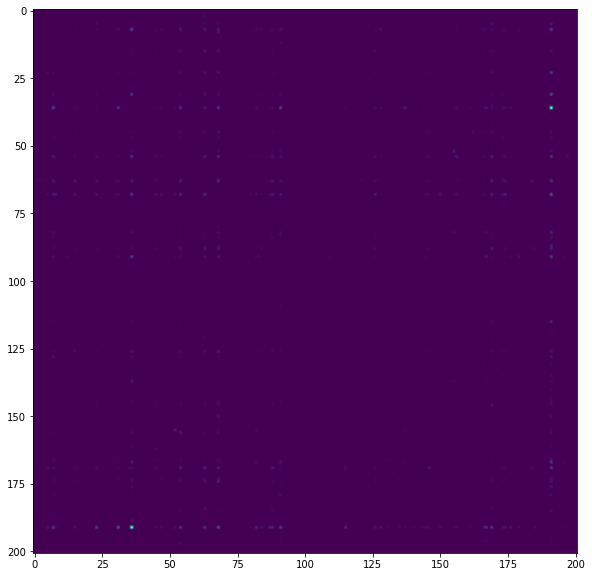

In [91]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
terrmat2 = terrmat.copy()
for i in range(len(terrmat2)):
    terrmat2[i,i] = 0.0
ax.imshow(terrmat2)

# Networkx

In [124]:
terrmat[terrdict[setc[0]],terrdict[setc[0]]]

4844.0

In [147]:
G = nx.Graph()
for i in range(len(setc)):
    G.add_node(setc[i], size = terrmat[terrdict[setc[i]],terrdict[setc[i]]])
    
for i in range(len(c1)):
    if c1[i] > c2[i]:
        G.add_edge( dictterr[c1[i]], dictterr[c2[i]], weight = terrmat[c1[i],c2[i]] )

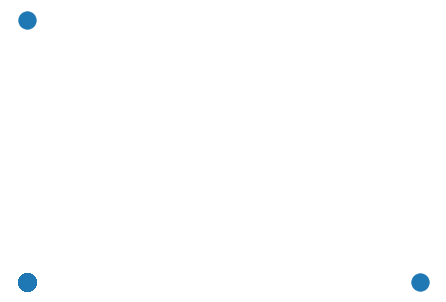

In [133]:
#nx.draw(G)
#nx.draw_random(G)
#nx.draw_circular(G)
#nx.draw_spectral(G)

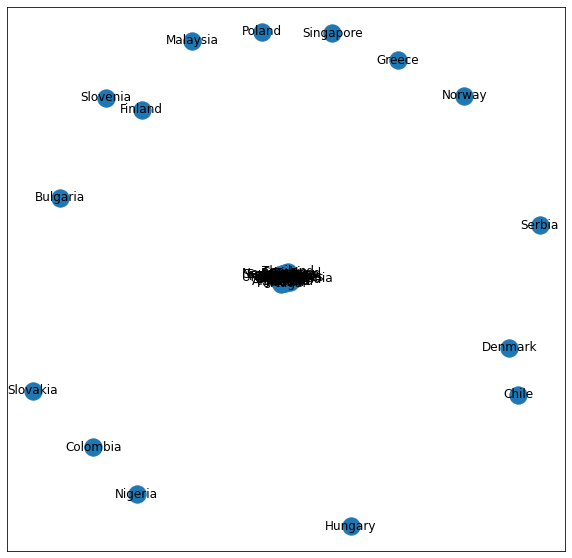

In [157]:
fig = plt.figure(figsize=(10,10))

pos = nx.spring_layout(G, scale=1)
#pos = nx.shell_layout(G)
#pos = nx.random_layout(G)
#pos = nx.spectral_layout(G)
nx.draw_networkx(G, pos)

In [129]:
G.nodes(data=True)

NodeDataView({'France': {'size': 4844.0}, 'Tunisia': {'size': 511.0}, 'Switzerland': {'size': 1106.0}, 'Portugal': {'size': 944.0}, 'Malaysia': {'size': 700.0}, 'New Zealand': {'size': 1735.0}, 'Australia': {'size': 6347.0}, 'Turkey': {'size': 2690.0}, 'Netherlands': {'size': 1746.0}, 'Japan': {'size': 14640.0}, 'Canada': {'size': 5318.0}, 'Germany': {'size': 8552.0}, 'Mexico': {'size': 2490.0}, 'United States': {'size': 34628.0}, 'South Africa': {'size': 2869.0}, 'Brazil': {'size': 8150.0}, 'Saudi Arabia': {'size': 133.0}, 'Italy': {'size': 6380.0}, 'Scotland': {'size': 635.0}, 'Israel': {'size': 1798.0}, 'South Korea': {'size': 5669.0}, 'Belgium': {'size': 1426.0}, 'Czechia': {'size': 1549.0}, 'Norway': {'size': 610.0}, 'Denmark': {'size': 913.0}, 'Finland': {'size': 693.0}, 'Pakistan': {'size': 908.0}, 'Taiwan': {'size': 2904.0}, 'England': {'size': 3511.0}, 'Sweden': {'size': 1270.0}, 'Poland': {'size': 3554.0}, 'Thailand': {'size': 1071.0}, 'Serbia': {'size': 570.0}, 'Spain': {'si